In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Add some physical examples to motivate root finding. Just using algebraic examples up to this point.

#Solving Algebraic Equations: Root-finding Methods

Solving a linear equation (e.g. $y=mx+b$) is one of the first topic one encounters in any sort of introductory algebra course. This of course can be done by hand quite easily. One of course then moves onto more sophisticated equations involving terms like $x^2,x^3,\ldots$. For example, the equation $$x^2+10x+9=0$$ can be solved using the familiar quadratic formula $x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$ where $a=1$, $b=10$, and $c=9$. Applying the quadratic formula, we see that $x=-1,-9$. When we plot the function $f(x)=x^2+10x+9$, we can see that $f=0$ at $x=-1$ and $x=-9$. 

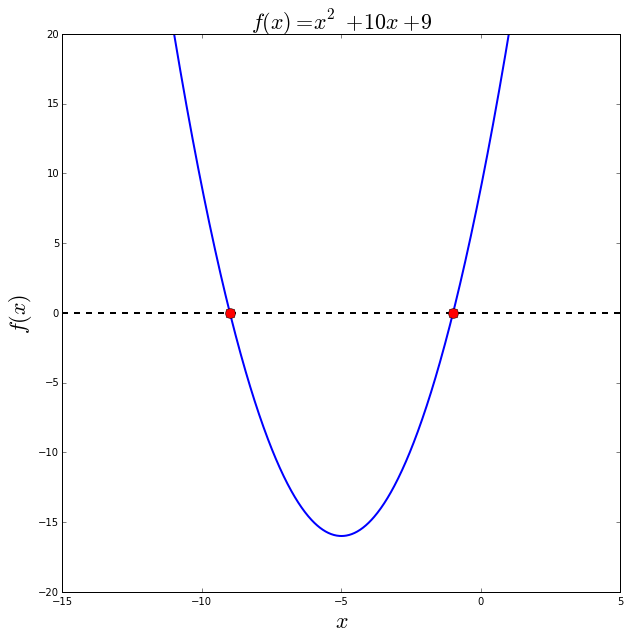

In [20]:
x=np.linspace(-15,5,1000)
x_zeros=[-1,-9]
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,0*x,'--k',linewidth=2.0)
ax.plot(x,x**2+10*x+9,linewidth=2.0)
ax.plot(x_zeros,[0,0],'ro',markersize=10)
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$f(x)$',fontsize=22)
ax.set_title(r'$f(x)=x^2+10x+9$',fontsize=22)
ax.set_ylim([-20,20])
plt.show()

These types of equations, often referred to as polynomials, can also be solved through factorization. For example, the equation $$x^3+6x^2+11x+6=0$$ can be rewritten as $$(x+1)(x+2)(x+3)=0$$ such that $x=-1,-2,-3$ are all roots of the equation. Again, let's plot the function and the roots to check our answer.

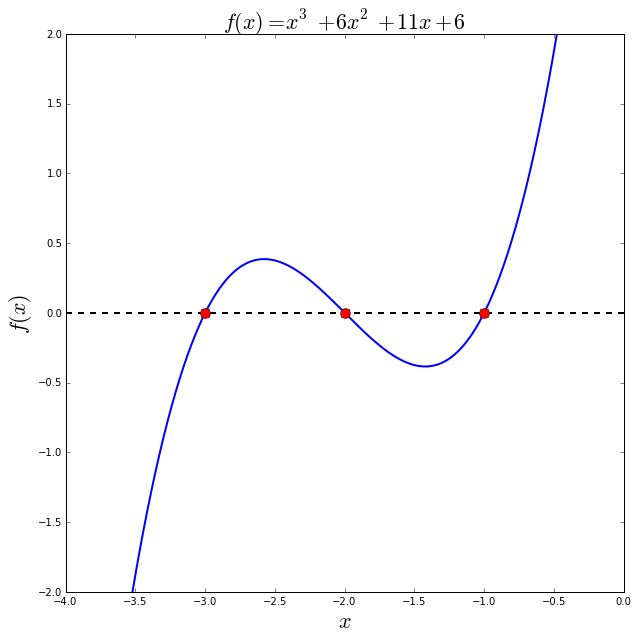

In [21]:
x=np.linspace(-4,0,1000)
x_zeros=[-1,-2,-3]
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,0*x,'--k',linewidth=2.0)
ax.plot(x,x**3+6*x**2+11*x+6,linewidth=2.0)
ax.plot(x_zeros,[0,0,0],'ro',markersize=10)
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$f(x)$',fontsize=22)
ax.set_title(r'$f(x)=x^3+6x^2+11x+6$',fontsize=22)
ax.set_ylim([-2,2])
plt.show()

Note also that finding the value of $x$ where $f(x)=0$ is the just as easy as finding the value of $x$ where $f(x)=a$, where $a$,a constant, is some value of $f$. This is because $f(x)=a$ can be rewritten as $f(x)-a=0$. Thus, we can rewrite $f(x)=a$ as a root-finding problem $g(x)=0$ where $g(x)=f(x)-a$.

So far, we've only considered the case of finding roots of polynomials. In these cases, we could always find the roots using either the quadratic formula (when our leading term was $x^2$) or a factorization method when possible. But what if our function is more complicated, say $f(x)=2x^2\sin(x)+\ln(x)$, or better yet, what if our function is unknown altogether? Often, we resort to **root finding algorithms** where we make a first guess about the root of our function and then repeatedly refine our guess until we have a reasonably accurate estimate of the root.

##Bisection Method

One of the most popular root-finding methods is known as the **bisection method**. In order to apply the bisection method, there are two important requirements:

1. the function $f$ must be _monotonically increasing (or decreasing)_ between $x=a$ and $x=b$, 
2. between $f(x=a)$ and $f(x=b)$, $f(x)=0$ for some value of $x=x_0$ such that $a<x_0<b$.

Let's consider what both of these conditions actually mean. Consider a function $f$ that is _monotonically increasing (or decreasing)_ from $x=a$ to $x=b$. This is just a fancy way of saying that as we move from $a$ to $b$, $f$ **only** increases (or **only** decreases). For example, the above function ($f(x)=x^3+6x^2+11x+6$) is neither monotonically increasing or decreasing on the interval shown, $x\in[-4,0]$. However, from $x=-4$ to $x=-2-\sqrt{3}/3$, the function increases, from $x=-2-\sqrt{3}/3$ to $x=-2+\sqrt{3}/3$ the function decreases, and then from $x=-2+\sqrt{3}/3$ to $x=0$, the function increases. Thus, when applying our bisection method, we must use it on each of these intervals individually. Lets consider the middle interval, $x\in[-2-\sqrt{3}/3,-2+\sqrt{3}/3]$.

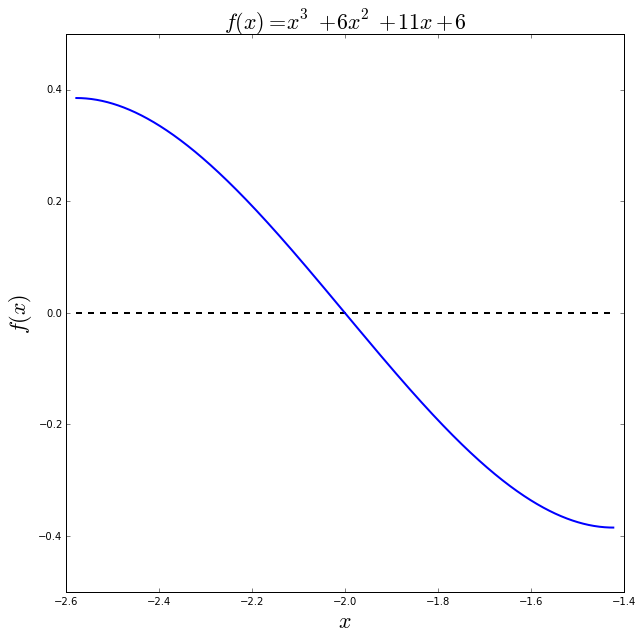

In [22]:
xzoom = np.linspace(-2.0-np.sqrt(3.0)/3.0,-2.0+np.sqrt(3.0)/3.0,1000)
def cubic_func(x):
    return x**3+6*x**2+11*x+6
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(xzoom,0*xzoom,'--k',linewidth=2.0)
ax.plot(xzoom,cubic_func(xzoom),linewidth=2.0)
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$f(x)$',fontsize=22)
ax.set_title(r'$f(x)=x^3+6x^2+11x+6$',fontsize=22)
ax.set_ylim([-.5,.5])
plt.show()

Let's call $a=-2.3$ and $b=-1.5$. Looking at the above figure, we can see that between $f(a)$ and $f(b)$, $f=0$ (i.e. the blue curve intersects the black dotted line). Thus, we have also satisfied the second condition for applying the bisection method to find the roots of our function. Now that we've shown that conditions for applying the bisection method are satisfied, how exactly does the method work?

1. Input interval endpoints $a,b$ for a function $f$ which satisfies the above conditions.
2. Calculate first guess of root $c=a+(b-a)/2$ and evaluate $f(c)$.
3. Calculate $f(a)\times f(c)$,

   * If $f(a)\times f(c)>0$ (i.e. $c$ is on the same side of the root as $a$), set $a=c$ and update $c$.
   * If $f(a)\times f(c)<0$ (i.e. $c$ is on the same side of the root as $b$), set $b=c$ and update $c$.
   
4. Evalute $f(c)$.
5. Repeat steps 3 and 4 for a finite number of steps or until $f(c)<\epsilon$, where $\epsilon$ is some specified error.

Now let's write a function that performs the bisection method which accepts the bounds on our interval $a,b$ and our function $f$. Note that we can write our bisection method function in such a way that it is not specific to the kind of function to which we apply it. This will allow us to reuse this piece of code for several different functions.

In [36]:
def bisection(a,b,f,options):
    """Bisection method for interval (a,b) as applied to a monotonically increasing (or decreasing) function f on (a,b)"""
    
    #First guess for root value
    c = a + (b - a)/2
    
    #Evaluate function at first guess
    f_guess = f(c)
    
    #Initialize the counter
    count = 0
    
    #Initialize lists of endpoints and roots
    a_list = [a]
    b_list = [b]
    c_list = [c]
    
    #Begin iteration
    while(count<options['max_count'] and np.fabs(f_guess)>options['tol']):
        #Output iteration and endpoints
        print "Iteration %d, Endpoints (%f,%f)"%(count,a,b)
        
        #Check relative sign
        if f_guess*f(a)>0:
            #advance left endpoint
            a=c
        elif f_guess*f(a)<0:
            #advance right endpoint
            b=c
        else:
            #case where f(c)==0
            print "f(c) == 0 exactly. Breaking out of loop."
            break
            
        #update root value guess
        c = a + (b-a)/2
        
        #evaluate function at current guess
        f_guess = f(c)
        
        #save a,b,c values
        a_list.append(a)
        b_list.append(b)
        c_list.append(c)
        
        #update the counter
        count = count + 1
        
    #print final zero approximation
    print "Value of the function at approximate zero is f(c=%f)=%f"%(c,f_guess)
    
    #return lists of a,b,c
    return a_list,b_list,c_list

Now that we have an algorithm for our bisection method, let's apply it to the above function for our chosen endpoints $a=-2.3$ and $b=-1.5$.

In [37]:
opt = {'max_count':100,'tol':1.0e-10}
alist,blist,clist = bisection(-2.5,-1.9,cubic_func,opt)

Iteration 0, Endpoints (-2.500000,-1.900000)
Iteration 1, Endpoints (-2.200000,-1.900000)
Iteration 2, Endpoints (-2.050000,-1.900000)
Iteration 3, Endpoints (-2.050000,-1.975000)
Iteration 4, Endpoints (-2.012500,-1.975000)
Iteration 5, Endpoints (-2.012500,-1.993750)
Iteration 6, Endpoints (-2.003125,-1.993750)
Iteration 7, Endpoints (-2.003125,-1.998437)
Iteration 8, Endpoints (-2.000781,-1.998437)
Iteration 9, Endpoints (-2.000781,-1.999609)
Iteration 10, Endpoints (-2.000195,-1.999609)
Iteration 11, Endpoints (-2.000195,-1.999902)
Iteration 12, Endpoints (-2.000049,-1.999902)
Iteration 13, Endpoints (-2.000049,-1.999976)
Iteration 14, Endpoints (-2.000012,-1.999976)
Iteration 15, Endpoints (-2.000012,-1.999994)
Iteration 16, Endpoints (-2.000003,-1.999994)
Iteration 17, Endpoints (-2.000003,-1.999998)
Iteration 18, Endpoints (-2.000001,-1.999998)
Iteration 19, Endpoints (-2.000001,-2.000000)
Iteration 20, Endpoints (-2.000000,-2.000000)
Iteration 21, Endpoints (-2.000000,-2.000000

Thus, we see that our bisection method performs very well for our cubic function on the given interval. This provides a nice check of our method as we can analytically verify (by hand) that our root on this interval is $x=-2$. Now let's apply this method over the two remaining intervals to find our other zeros. For the leftmost interval, we'll choose $a=-5,b=-2-\sqrt{3}/3$ and for the rightmost interval, we'll choose $a=-2+\sqrt{3}/3,b=4$.

In [38]:
opt['tol'] = 1.0e-6
aleft,bleft,cleft=bisection(-5.0,-2.0-np.sqrt(3.0)/3.0,cubic_func,opt)

Iteration 0, Endpoints (-5.000000,-2.577350)
Iteration 1, Endpoints (-3.788675,-2.577350)
Iteration 2, Endpoints (-3.183013,-2.577350)
Iteration 3, Endpoints (-3.183013,-2.880181)
Iteration 4, Endpoints (-3.031597,-2.880181)
Iteration 5, Endpoints (-3.031597,-2.955889)
Iteration 6, Endpoints (-3.031597,-2.993743)
Iteration 7, Endpoints (-3.012670,-2.993743)
Iteration 8, Endpoints (-3.003207,-2.993743)
Iteration 9, Endpoints (-3.003207,-2.998475)
Iteration 10, Endpoints (-3.000841,-2.998475)
Iteration 11, Endpoints (-3.000841,-2.999658)
Iteration 12, Endpoints (-3.000249,-2.999658)
Iteration 13, Endpoints (-3.000249,-2.999954)
Iteration 14, Endpoints (-3.000101,-2.999954)
Iteration 15, Endpoints (-3.000028,-2.999954)
Iteration 16, Endpoints (-3.000028,-2.999991)
Value of the function at approximate zero is f(c=-3.000000)=0.000000


In [39]:
aright,bright,cright=bisection(-2.0+np.sqrt(3.0)/3.0,4.0,cubic_func,opt)

Iteration 0, Endpoints (-1.422650,4.000000)
Iteration 1, Endpoints (-1.422650,1.288675)
Iteration 2, Endpoints (-1.422650,-0.066987)
Iteration 3, Endpoints (-1.422650,-0.744819)
Iteration 4, Endpoints (-1.083734,-0.744819)
Iteration 5, Endpoints (-1.083734,-0.914276)
Iteration 6, Endpoints (-1.083734,-0.999005)
Iteration 7, Endpoints (-1.041370,-0.999005)
Iteration 8, Endpoints (-1.020187,-0.999005)
Iteration 9, Endpoints (-1.009596,-0.999005)
Iteration 10, Endpoints (-1.004301,-0.999005)
Iteration 11, Endpoints (-1.001653,-0.999005)
Iteration 12, Endpoints (-1.000329,-0.999005)
Iteration 13, Endpoints (-1.000329,-0.999667)
Iteration 14, Endpoints (-1.000329,-0.999998)
Iteration 15, Endpoints (-1.000164,-0.999998)
Iteration 16, Endpoints (-1.000081,-0.999998)
Iteration 17, Endpoints (-1.000040,-0.999998)
Iteration 18, Endpoints (-1.000019,-0.999998)
Iteration 19, Endpoints (-1.000008,-0.999998)
Iteration 20, Endpoints (-1.000003,-0.999998)
Iteration 21, Endpoints (-1.000001,-0.999998)


Our bisection method is able to calculate the zeros of our cubic function in a reasonable number of iterations. Now that we've shown that our bisection algorithm works, let's apply it to a more useful case: an unknown function where we can't use a simple method like the quadratic formula or factorization to find the zeros.

In [68]:
%run make_unknown_function

x and y data for unknown function saved in  example_data/root_finding_unknown_function.txt
Name of unknown function is sine_integral_func


In [69]:
unknowns = np.loadtxt('example_data/root_finding_unknown_function.txt')
x_unknown = unknowns[0,:]
y_unknown = unknowns[1,:]

Now let's plot our unknown function to determine where it is monotonically increasing/decreasing. We'll make smart choices about our intervals by "bracketing" our function at $(0.5,2.9)$ and $(3.5,6)$. Note that we are free to make any choice when it comes to our intervals provided that on $(a,b)$, $f$ is either monotonically increasing or decreasing.

In [70]:
a1 = 0.5
b1 = 2.9
a2 = 3.5
b2 = 6.0

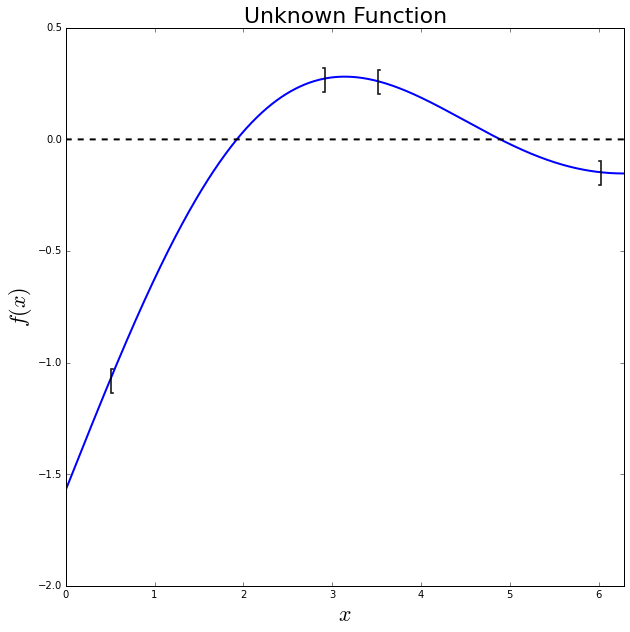

In [71]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x_unknown,y_unknown,linewidth=2.0)
ax.plot(x_unknown,0*x_unknown,'--k',linewidth=2.0)
ax.plot([a1,a2],[y_unknown[np.where(x_unknown<a1)[0][-1]],y_unknown[np.where(x_unknown<a2)[0][-1]]],'ko',marker=r'$[$',markersize=25)
ax.plot([b1,b2],[y_unknown[np.where(x_unknown<b1)[0][-1]],y_unknown[np.where(x_unknown<b2)[0][-1]]],'ko',marker=r'$]$',markersize=25)
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$f(x)$',fontsize=22)
ax.set_title(r'Unknown Function',fontsize=22)
ax.set_xlim([x_unknown[0],x_unknown[-1]])
plt.show()

Now, we can apply our bisection method to this new unknown function to try to find the roots of this equation. Note that here we cannot use our quadratic method or factorization; the form of the function has been defined when we ran the script `make_unknown_function.py`. It is only important to know the form of the function so that we can feed it to the bisection method; suffice it to say that is complicated.

In [73]:
a1list,b1list,c1list = bisection(a1,b1,sine_integral_func,opt)
a2list,b2list,c2list = bisection(a2,b2,sine_integral_func,opt)

Iteration 0, Endpoints (0.500000,2.900000)
Iteration 1, Endpoints (1.700000,2.900000)
Iteration 2, Endpoints (1.700000,2.300000)
Iteration 3, Endpoints (1.700000,2.000000)
Iteration 4, Endpoints (1.850000,2.000000)
Iteration 5, Endpoints (1.925000,2.000000)
Iteration 6, Endpoints (1.925000,1.962500)
Iteration 7, Endpoints (1.925000,1.943750)
Iteration 8, Endpoints (1.925000,1.934375)
Iteration 9, Endpoints (1.925000,1.929688)
Iteration 10, Endpoints (1.925000,1.927344)
Iteration 11, Endpoints (1.926172,1.927344)
Iteration 12, Endpoints (1.926172,1.926758)
Iteration 13, Endpoints (1.926172,1.926465)
Iteration 14, Endpoints (1.926318,1.926465)
Iteration 15, Endpoints (1.926392,1.926465)
Value of the function at approximate zero is f(c=1.926447)=-0.000001
Iteration 0, Endpoints (3.500000,6.000000)
Iteration 1, Endpoints (4.750000,6.000000)
Iteration 2, Endpoints (4.750000,5.375000)
Iteration 3, Endpoints (4.750000,5.062500)
Iteration 4, Endpoints (4.750000,4.906250)
Iteration 5, Endpoints

Now, let's plot the zeros on top of our plot of the unknown function to get a sense of how good our guess is.

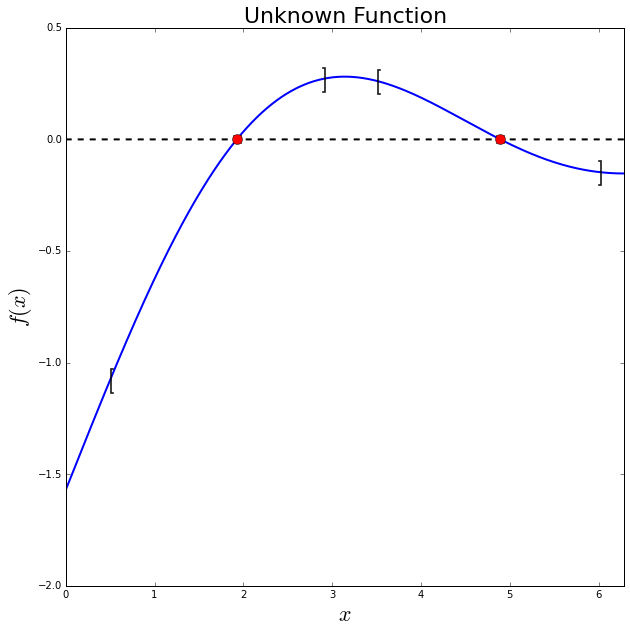

In [75]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x_unknown,y_unknown,linewidth=2.0)
ax.plot(x_unknown,0*x_unknown,'--k',linewidth=2.0)
ax.plot([a1,a2],[y_unknown[np.where(x_unknown<a1)[0][-1]],y_unknown[np.where(x_unknown<a2)[0][-1]]],'ko',marker=r'$[$',markersize=25)
ax.plot([b1,b2],[y_unknown[np.where(x_unknown<b1)[0][-1]],y_unknown[np.where(x_unknown<b2)[0][-1]]],'ko',marker=r'$]$',markersize=25)
ax.plot([c1list[-1],c2list[-1]],[sine_integral_func(c1list[-1]),sine_integral_func(c2list[-1])],'ro',markersize=10)
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$f(x)$',fontsize=22)
ax.set_title(r'Unknown Function',fontsize=22)
ax.set_xlim([x_unknown[0],x_unknown[-1]])
plt.show()